In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

Text(0.2, 0.4, '한글')

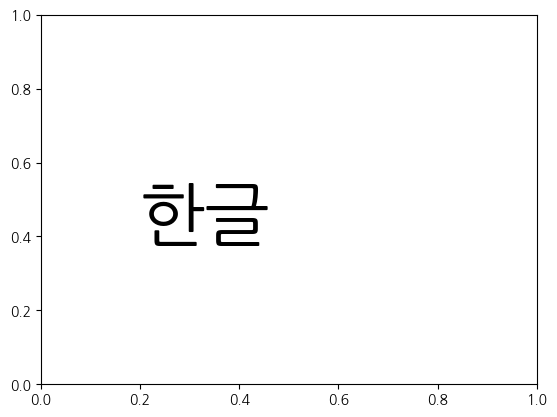

In [2]:
# 윈도우용 폰트 경로 설정
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=50)

In [3]:
# csv 파일 임포트
file_path = "./data ref/출입국항구내외국인성별국제이동연간(김해)20250305.csv"
ori = pd.read_csv(file_path, encoding = "EUC-KR") # 우분투일 때는 utf 파일은 생략 가능~
ori.head()

,시점,항목,출입국항별,내외국인별,성별,데이터
0,2000,입국자,김해(김해공항),내국인,남자,4538
1,2000,입국자,김해(김해공항),내국인,여자,4306
2,2000,입국자,김해(김해공항),외국인,남자,1845
3,2000,입국자,김해(김해공항),외국인,여자,1651
4,2000,출국자,김해(김해공항),내국인,남자,6373


In [4]:
ex1_data = ori.copy()
ex1_data.columns = ["year","type1","airport","type2","gender","value"]
ex_data=ex1_data.copy()
ex1_data

,year,type1,airport,type2,gender,value
0,2000,입국자,김해(김해공항),내국인,남자,4538
1,2000,입국자,김해(김해공항),내국인,여자,4306
2,2000,입국자,김해(김해공항),외국인,남자,1845
3,2000,입국자,김해(김해공항),외국인,여자,1651
4,2000,출국자,김해(김해공항),내국인,남자,6373
...,...,...,...,...,...,...
187,2023,입국자,김해(김해공항),외국인,여자,17574
188,2023,출국자,김해(김해공항),내국인,남자,8976
189,2023,출국자,김해(김해공항),내국인,여자,6860
190,2023,출국자,김해(김해공항),외국인,남자,12422


In [5]:
# 필터 제작
filter1 = ex1_data['type2']=='내국인'
ex1_data = ex1_data[filter1]
ex2_data = ex1_data.copy()
ex3_data = ex1_data.copy()
ex4_data = ex1_data.copy()

In [6]:
ex1_data = ex1_data.groupby('year')['value'].sum().reset_index(name='total')

In [7]:
ex2_data
# 입국자만 추출하기
filter2 = ex2_data['type1']=='입국자'
ex2_data = ex2_data[filter2]
ex2_data = ex2_data.groupby('year')['value'].sum().reset_index(name="total")

In [8]:
ex3_data
# 출국자만 추출하기
filter3 = ex3_data['type1']=='출국자'
ex3_data[filter3]
ex3_filtered = ex3_data[filter3]
ex3_data = ex3_filtered.groupby('year')['value'].sum().reset_index(name="total")

In [9]:
ex4_data
# 내국인 전부
ex4_data = ex4_data.groupby('year')['value'].sum().reset_index(name="total")

In [10]:
# 필터 제작 (외국인)
filter4 = ex_data['type2']=='외국인'
ext_data= ex_data[filter4]
ext_data = ext_data.groupby('year')['value'].sum().reset_index(name="total")

In [11]:
from prophet import Prophet
# from .autonotebook import tqdm as notebook_tqdm

In [12]:
# 페이스북에서는 time(year)을 ds, value는 y를 사용하므로 전처리 해준다.
ex5_data = ex1_data.copy()
ex5_data['year'] = pd.to_datetime(ex5_data['year'],format="%Y")  # 날짜 형식을 아예 년월일 형식으로 잡아줌!
ex5_data = ex5_data.rename(columns={'year':'ds','total':'y'})
ex5_data.tail()

,ds,y
19,2019-01-01,58563
20,2020-01-01,23970
21,2021-01-01,899
22,2022-01-01,9659
23,2023-01-01,31093


In [13]:
m= Prophet()
m.fit(ex5_data)  # fit은 트레이닝 시켜주는 것 !

15:28:09 - cmdstanpy - INFO - Chain [1] start processing
15:28:09 - cmdstanpy - INFO - Chain [1] done processing


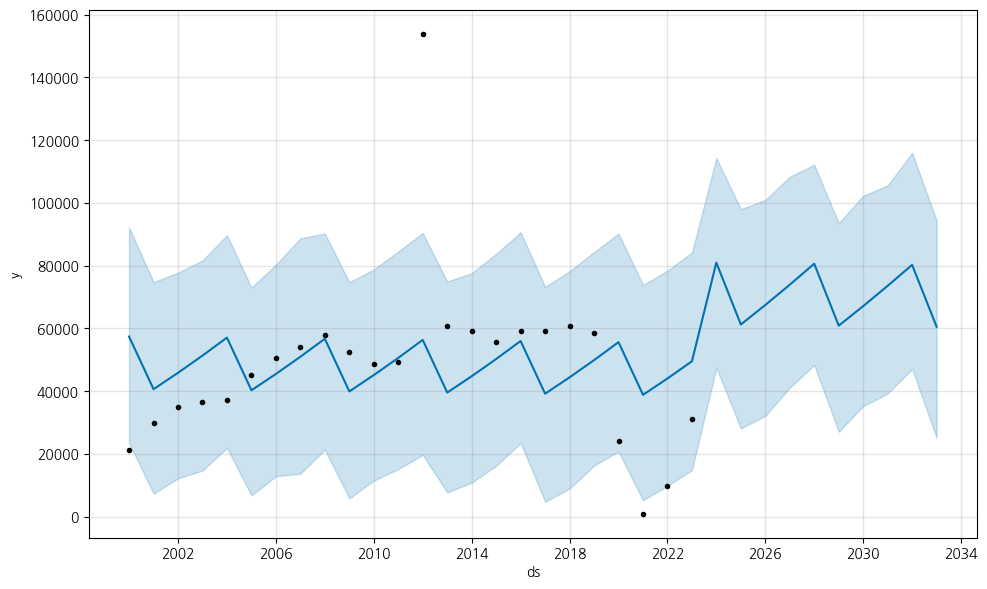

<Figure size 1500x2000 with 0 Axes>

In [14]:
future = m.make_future_dataframe(periods=10,freq='YE') # 10년 후까지의 데이터 예측
forecast = m.predict(future)   # fit 한 값을 토대로 predict 하는 것 !!
fig1 = m.plot(forecast)
plt.savefig("./data ref/chart/예측(팀과제).png")
plt.figure(figsize=(15,20))
plt.show()  # 미래를... 예측하는... 그래프 ~~!

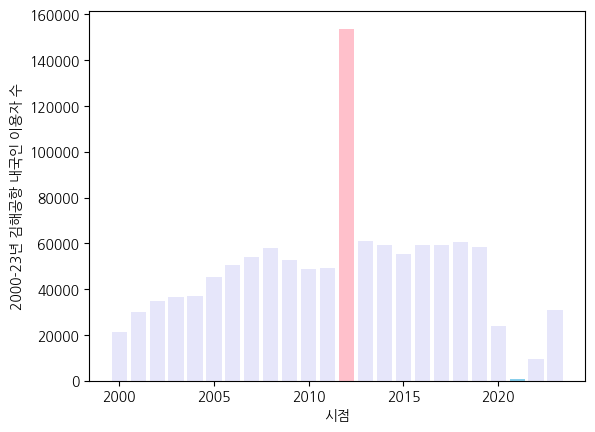

In [15]:
max_value = max(ex1_data['total'])
min_value = min(ex1_data['total'])

color = ["pink" if value == max_value else "skyblue" if value == min_value else "lavender" for value in ex1_data['total']]
        
plt.bar(ex1_data['year'], ex1_data['total'], color=color)

# 축 레이블 설정
plt.xlabel("시점")
plt.ylabel("2000-23년 김해공항 내국인 이용자 수")

# 그래프 보여주기
plt.show()

- 김해공항 내국인 이용자 수를 보았을 때, 2012년에 가장 이용자 수가 많으며, 2021년에 가장 적다.
  > 2012년에 부산에 야구 대회 중 하나인 아시아 시리즈가 열렸는데, 아마 그 여파가 아닌가 싶다.
  > 2021년 이용자가 수가 가장 작은 것은, 코로나의 여파일 것으로 추정된다.

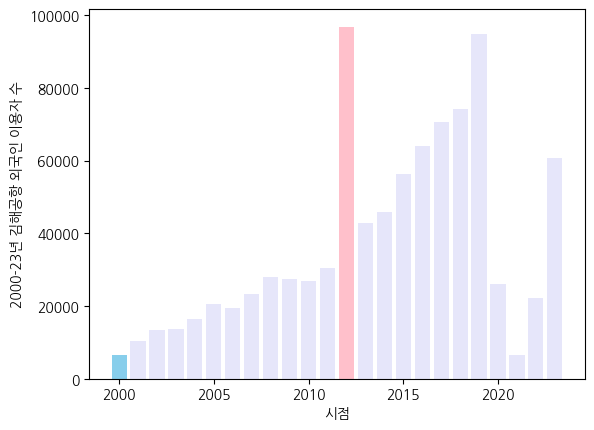

In [16]:
max_value = max(ext_data['total'])
min_value = min(ext_data['total'])

color = ["pink" if value == max_value else "skyblue" if value == min_value else "lavender" for value in ext_data['total']]
        
plt.bar(ext_data['year'], ext_data['total'], color=color)

# 축 레이블 설정
plt.xlabel("시점")
plt.ylabel("2000-23년 김해공항 외국인 이용자 수")

# 그래프 보여주기
plt.show()

- 외국인 이용자 수도 마찬가지로 2012년에 제일 높았다.
- 외국인 사용자도 증가추세를 보이다가 코로나 사태 전후로 줄어드는 경향을 보인다.
- 코로나가 끝난 후 다시 성장세를 보이고 있다.

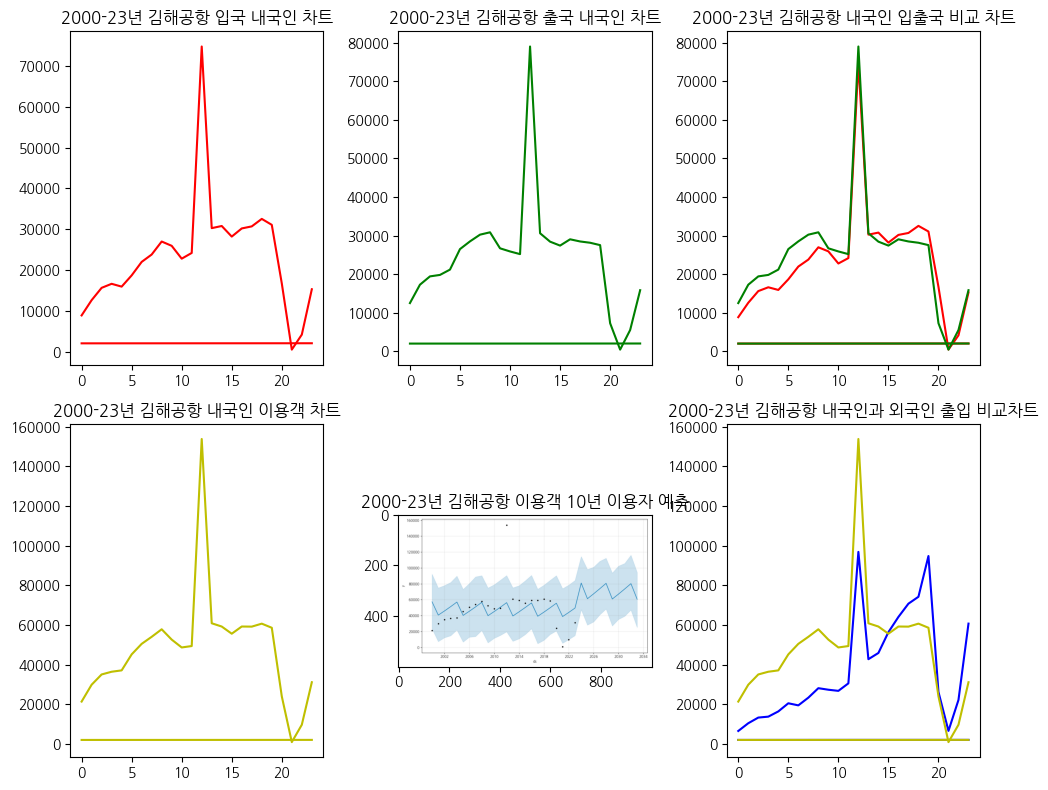

In [17]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,3,figsize=(10,8))  # 2 x 2 서브 플롯 생성 : 4개가 생성된다는 뜻이다~
   # 행렬로 위치를 표현한다고 생각하면 된다 !! ex) axs[0,0]
import matplotlib.image as mpimg
# 이미지 불러오기
img = mpimg.imread("./data ref/chart/예측(팀과제).png")

axs[0,0].plot(ex2_data,color="r")    
axs[0,1].plot(ex3_data,color="g")
axs[0,2].plot(ex2_data,color="r")
axs[0,2].plot(ex3_data,color="g")
axs[1,0].plot(ex4_data,color='y')
axs[1,2].plot(ext_data,color='b')
axs[1,2].plot(ex4_data,color='y')
axs[0,0].set_title("2000-23년 김해공항 입국 내국인 차트")
axs[0,1].set_title("2000-23년 김해공항 출국 내국인 차트")
axs[0,2].set_title("2000-23년 김해공항 내국인 입출국 비교 차트")
axs[1,0].set_title("2000-23년 김해공항 내국인 이용객 차트")
axs[1,1].set_title("2000-23년 김해공항 이용객 10년 이용자 예측")
axs[1,2].set_title("2000-23년 김해공항 내국인과 외국인 출입 비교차트")


axins = fig.add_axes(axs[1,1])
axins.imshow(img)
plt.tight_layout()
plt.show()    # 그래프를 찍어보았어요~!

- 내국인 출입국 이용객 수는 전반적으로 2012년 높았으며, 2021년 가장 낮은 추세를 보인다.
- 외국인 출입국 이용객 수는 2012년을 제외하면 점차적으로 상승하는 모습을 보이다가, 코로나가 발병한 후
  눈에 띄는 감소세를 보였다.
- 이후 코로나가 안정되자 다시 증가하는 모습을 보인다.